# PIE CHART: 2 categorical variables

In [1]:
import seaborn
import warnings
warnings.filterwarnings('ignore')

### data

In [3]:
df = seaborn.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### pie chart 2D

In [90]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## pie chart for 2 categorical variables
def pie2D(df:pd.DataFrame, varname_out:str, varname_in:str):
    """
    Pie chart for 2 categorical variables.
    df -- data.
    varname_out -- categorical variable name with only 2 categories.
    varname_in -- categorical variable with maximum 5 categories.
    """
    # validate
    assert varname_out in df.columns.tolist()
    assert varname_in in df.columns.tolist()
    nu_out = len(df[varname_out].unique())
    assert nu_out <= 2, f'it is not possible more than 5 categories for "{varname_out}".'
    nu_in = len(df[varname_in].unique())
    assert nu_in <= 5, f'it is not possible more than 5 categories for "{varname_in}".'

    # grouping
    by_varin = df.groupby(varname_out)[varname_in].value_counts().to_frame().rename(columns={varname_in: 'Freq'}).reset_index().sort_values(varname_out)

    # Make data: I have 3 groups and 7 subgroups
    group_names=df[varname_out].value_counts().index
    group_size=df[varname_out].value_counts()
    subgroup_names=by_varin[varname_in]
    subgroup_size=by_varin['Freq']

    # Create colors
    all_colors = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.Purples, plt.cm.Greys]
    colors = all_colors[:nu_out]
    colors_in = list()
    for c in colors:
        for i in np.arange(0.6,0.1,-0.1)[:nu_in]:
            colors_in.append(c(i))

    # First Ring (outside)
    fig, ax = plt.subplots()
    fig.suptitle(f'{varname_out} by {varname_in}')
    ax.axis('equal')
    mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[c(0.8) for c in colors])
    plt.setp( mypie, width=0.3, edgecolor='white')

    # Second Ring (Inside)
    mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=colors_in)
    plt.setp( mypie2, width=0.4, edgecolor='white')
    plt.margins(0,0)

    # show it
    plt.show()

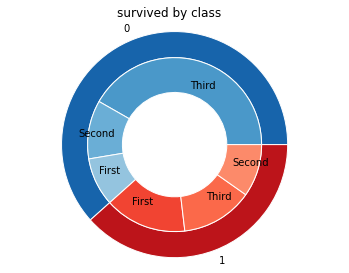

In [91]:
varname_in = 'class'
varname_out = 'survived'
pie2D(df, varname_out, varname_in)

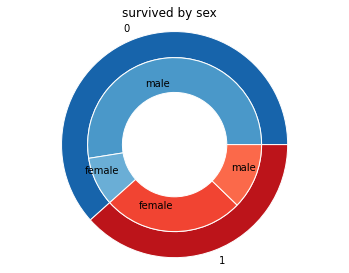

In [92]:
varname_in = 'sex'
varname_out = 'survived'
pie2D(df, varname_out, varname_in)